In [1]:
%matplotlib inline
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [2]:
datafile = uproot.open("/mnt/Storage/fmanzali/FlatComplete/eplus_hits_dn_0.root")
datafile.keys()

[b'lpmt_hits;187',
 b'lpmt_hits;186',
 b'spmt_hits;5',
 b'spmt_hits;4',
 b'true_info;1',
 b'lpmt_pos;1',
 b'spmt_pos;1']

In [3]:
trueINFO = datafile["true_info"]
trueINFO_pd = trueINFO.pandas.df()
trueINFO_pd

,evtID,E,x,y,z,R
entry,,,,,,
0,0,4.747791,8290.779297,11995.618164,911.742859,14610.377930
1,1,3.919721,11397.631836,5407.449707,-7409.082031,14630.140625
2,2,6.823932,14063.337891,-3812.854004,246.652802,14573.131836
3,3,3.765940,-2377.930664,-16317.702148,3315.590332,16820.080078
4,4,3.217473,-8617.117188,868.511597,9730.986328,13026.938477
...,...,...,...,...,...,...
99995,99995,2.863076,-13419.921875,-9861.937500,-440.423920,16659.714844
99996,99996,4.219520,-8444.309570,-3457.845703,-8388.169922,12394.533203
99997,99997,7.254750,-15518.010742,7718.442383,-1728.948975,17417.585938


In [4]:
def filt_pos(frame):

    data = []
    for i in range(0,len(frame)):
        if frame.loc[i, 'R'] < 16500 and frame.loc[i, 'R'] > 15500:
                data.append({'evtID': frame.loc[i, 'evtID'], 'E': frame.loc[i, 'E'],
                           'x': frame.loc[i, 'x'],
                           'y': frame.loc[i, 'y'],
                           'z': frame.loc[i, 'z'],
                           'R': frame.loc[i, 'R']})
            
    trueINFO_pd_0 = pd.DataFrame(data)
    return trueINFO_pd_0

In [5]:
infoR = filt_pos(trueINFO_pd)
infoR

,evtID,E,x,y,z,R
0,6,7.886344,1658.723022,-12691.513672,-9842.650391,16146.320312
1,9,6.786881,-12249.327148,-8324.336914,-5930.173828,15953.292969
2,10,4.763122,3361.870117,11073.585938,-10755.718750,15799.112305
3,13,3.580564,-1830.479492,10861.013672,11719.223633,16082.675781
4,22,7.298966,6935.369141,13709.882812,5014.570801,16161.873047
...,...,...,...,...,...,...
13837,99967,5.350537,14676.946289,-3960.216553,-6015.730469,16348.855469
13838,99968,4.773934,509.530212,-82.437874,-16318.811523,16326.972656
13839,99969,8.014432,-13872.530273,-7181.908691,5250.836914,16480.236328
13840,99983,7.022244,-10696.417969,11144.188477,5766.138184,16488.015625


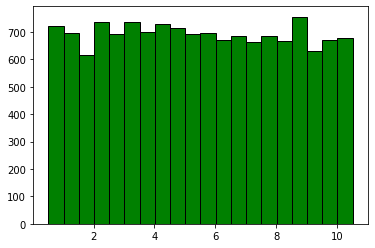

In [6]:
energyR = infoR.loc[:, 'E']
plt.hist(energyR, bins=20, ec='black', color='green')
plt.show()

In [7]:
def filt_en(frame):

    data = []
    for i in range(0,len(frame)):
        if frame.loc[i, 'E'] < 5.01 and frame.loc[i, 'E'] > 4.99:
                data.append({'evtID': frame.loc[i, 'evtID'], 'E': frame.loc[i, 'E'],
                           'x': frame.loc[i, 'x'],
                           'y': frame.loc[i, 'y'],
                           'z': frame.loc[i, 'z'],
                           'R': frame.loc[i, 'R']})
            
    trueINFO_pd_0 = pd.DataFrame(data)
    return trueINFO_pd_0

In [8]:
infoRE = filt_en(infoR)
infoRE

,evtID,E,x,y,z,R
0,1697,5.009135,3442.497559,68.556152,15229.882812,15614.250977
1,3014,4.998249,12064.197266,-9407.764648,3615.024170,15720.028320
2,5317,4.991637,-10421.459961,-5021.810547,-10379.775391,15542.366211
3,14209,4.996103,14692.335938,2030.771606,-5298.344238,15749.958984
4,15879,5.006918,-5636.401855,1463.661499,-14391.739258,15525.252930
5,20291,4.998295,-3870.526611,14595.229492,5393.209473,16033.976562
6,22692,4.995702,13688.493164,5964.493164,-5234.378906,15822.413086
7,24506,4.994953,1190.105835,-3137.876221,-15629.662109,15985.898438
8,28649,4.991839,-10810.223633,-6353.029297,10223.970703,16178.735352
9,30357,4.998882,-389.034180,-13945.994141,7211.244141,15704.908203


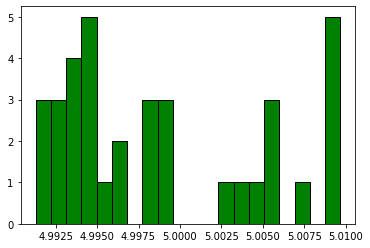

In [9]:
energyRE = infoRE.loc[:, 'E']
plt.hist(energyRE, bins=20, ec='black', color='green')
plt.show()

In [10]:
largePMT = datafile["lpmt_hits"]
ev1697 = largePMT.pandas.df(entrystart=1697, entrystop=1698)
ev1697.loc[1697]

,nHits,pmtID,hitTime,isDN
subentry,,,,
0,8782,3198,92.493179,False
1,8782,17392,208.871094,False
2,8782,449,38.129604,False
3,8782,14811,184.154160,False
4,8782,7254,127.011032,False
...,...,...,...,...
8777,8782,17645,584.111816,True
8778,8782,17678,326.890381,True
8779,8782,17679,835.401001,True


In [11]:
def no_DN (frame):
    data = []

    i = frame.index[0][0]
    a = 0
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False and frame.loc[i, 'hitTime'].loc[j] < 300:
            a += 1
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False and frame.loc[i, 'hitTime'].loc[j] < 300:
            data.append({'nHits': a,
                       'pmtID': frame.loc[i, 'pmtID'].loc[j],
                       'hitTime': frame.loc[i, 'hitTime'].loc[j] })
            
    frame_noDN = pd.DataFrame(data)
    return frame_noDN

In [12]:
ev1697_noDN = no_DN(ev1697)
ev1697_noDN

,nHits,pmtID,hitTime
0,7881,3198,92.493179
1,7881,17392,208.871094
2,7881,449,38.129604
3,7881,14811,184.154160
4,7881,7254,127.011032
...,...,...,...
7876,7881,1245,69.950600
7877,7881,516,26.608854
7878,7881,3740,118.859352
7879,7881,5187,282.022766


In [13]:
PMT_pos = datafile["lpmt_pos"]
PMT_pos_pd = PMT_pos.pandas.df()
PMT_pos_pd

,pmt_id,pmt_x,pmt_y,pmt_z
entry,,,,
0,0,1.049021e+03,0.000000,19171.320312
1,1,9.084785e+02,524.510315,19171.320312
2,2,5.245103e+02,908.478516,19171.320312
3,3,6.423399e-14,1049.020630,19171.320312
4,4,-5.245103e+02,908.478516,19171.320312
...,...,...,...,...
17734,17734,1.904750e+04,-2395.499268,-307.276520
17735,17735,1.910673e+04,-1865.088745,-307.276520
17736,17736,1.915119e+04,-1333.236816,-307.276520


In [14]:
def new_spherical (xyz):
    data = []
    for i in range(0, len(xyz)):
        r = np.sqrt(xyz.loc[i, 'pmt_x']**2 + xyz.loc[0,'pmt_y']**2 + xyz.loc[i, 'pmt_z']**2)
        theta = np.arccos((xyz.loc[i, 'pmt_z'])/r)
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = np.pi/2
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = 3*np.pi/2
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] >= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x']))
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] <= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) +2*np.pi
        elif (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] > 0) or (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] < 0):
            phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) + np.pi
        data.append({'pmt_id': i,
                    'pmt_r': r,
                    'pmt_theta': theta,
                    'pmt_phi': phi })
    rtp = pd.DataFrame(data)
    return rtp

In [15]:
PMT_spher_pd = new_spherical(PMT_pos_pd)
PMT_spher_pd

,pmt_id,pmt_r,pmt_theta,pmt_phi
0,0,19199.999136,0.054664,6.283185
1,1,19192.833447,0.047352,0.523599
2,2,19178.494039,0.027352,1.047198
3,3,19171.320312,0.000000,1.570796
4,4,19178.494039,0.027352,2.094395
...,...,...,...,...
17734,17734,19049.976396,1.586927,6.158078
17735,17735,19109.197230,1.586877,6.185879
17736,17736,19153.654386,1.586840,6.213681
17737,17737,19183.310731,1.586815,6.241483


In [16]:
def normal_ft(ev):
    data = []
    ma = ev.loc[:, 'hitTime'].max()
    mi = ev.loc[:, 'hitTime'].min()
    mami = ma - mi
    for i in range(0, len(ev)):
        a = ev.loc[i, 'nHits']
        b = ev.loc[i, 'pmtID']
        c = (ev.loc[i, 'hitTime'] - mi)/mami
        data.append({'nHits': a, 'pmtID': b, 'hitTime': c})
        
    norm = pd.DataFrame(data)
    return norm

In [17]:
ev1697_norm = normal_ft(ev1697_noDN)
ev1697_norm

,nHits,pmtID,hitTime
0,7881,3198,0.263595
1,7881,17392,0.679259
2,7881,449,0.069425
3,7881,14811,0.590978
4,7881,7254,0.386881
...,...,...,...
7876,7881,1245,0.183080
7877,7881,516,0.028277
7878,7881,3740,0.357766
7879,7881,5187,0.940534


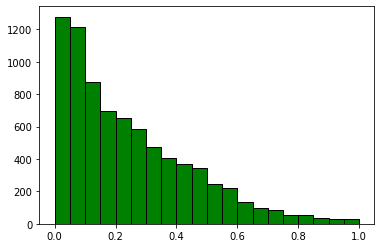

In [20]:
time1697 = ev1697_norm.loc[:, 'hitTime']
plt.hist(time1697, bins=20, ec='black', color='green')
plt.show()

In [18]:
def ev_mollweide (ev_map):
    # Set the coordinates for the input
    nside = 16
    npix = hp.nside2npix(nside)

    # Coordinates and the density field f
    thetas = PMT_spher_pd.loc[:, 'pmt_theta']
    phis = PMT_spher_pd.loc[:, 'pmt_phi']
    hitTime = ev_map.loc[:, 'hitTime']

    # Go from HEALPix coordinates to indices
    indices = hp.ang2pix(nside, thetas, phis)

    # Initate the map and fill it with the values
    hpxmap = np.zeros(npix, dtype=np.float)
    for i in range(len(ev_map)):
        hpxmap[indices[ev_map.loc[:, 'pmtID'].loc[i]]]  = hitTime.loc[i]
   # for j in range(len(hpxmap)):
   #     if hpxmap[j] == 0:
   #         hpxmap[j] = 1024
        
    # Inspect the map
    hp.mollview(hpxmap)

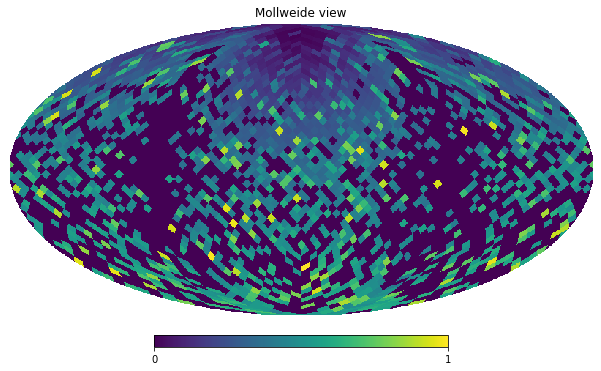

In [19]:
ev_mollweide(ev1697_norm)